In [371]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import mapclassify
from shapely.geometry import Point, Polygon
import xlrd

# World map read in
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# USA Map read in
usa = gpd.read_file('maps/USA_States/USA_States.shp')
usa = usa[(usa['STATE_ABBR'] != 'AK') & (usa['STATE_ABBR'] != 'HI')]

# Excel file read in and process
file = 'AFP200925.xlsx'
df = pd.read_excel(file)
df = df.rename(columns={'State': 'STATE_ABBR'})

In [372]:
# remove records
indexNames = df[~(df['Individual Type'] == 'Practitioner')].index
df.drop(indexNames, inplace=True)
df.head(2)
#df.info()

,First Name,Last Name,Company,Job Title,Industry,Address Line 1,Address Line 2,Address Line 3,City,STATE_ABBR,Zip,Country,Individual Type,Company Size
11,James,Barry,Stifel Financial,Director of Treasury & Capital Risk,Banking,501 N Broadway,NaN,NaN,Saint Louis,MO,63102-2131,UNITED STATES,Practitioner,$1-4.9 Billion
16,Sanchit,Beri,BMO Capital Markets,"Director, Treasury and Payment Solutions",Banking,50 E Bellevue Pl Apt 1304,NaN,NaN,Chicago,IL,60611-6113,UNITED STATES,Practitioner,$10-20 Billion


<Figure size 1080x720 with 0 Axes>

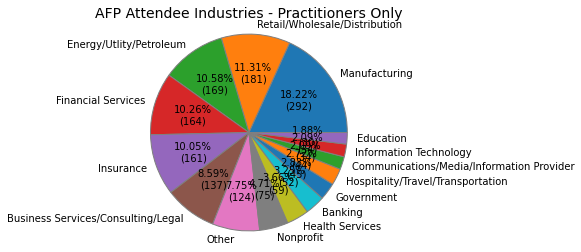

In [374]:
fig = plt.figure(figsize=(15,10))
fig, ax = plt.subplots()

ind_counts = df['Industry'].value_counts(dropna=True, sort=True)
df_ind = pd.DataFrame(ind_counts)
df_ind = df_ind.reset_index()
df_ind.columns = ['Industry', 'Attendees']

def make_autopct(values):
    def my_autopct(pct):
        total = sum(yaxis)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%\n({v:d})'.format(p=pct,v=val)
    return my_autopct

values = df_ind['Attendees']
labels = df_ind['Industry']
startangle = 0
title = 'AFP Attendee Industries - Practitioners Only'

ax.pie(values, autopct = lambda p:f'{p:.2f}%\n({p*sum(yvalues)/100 :.0f})',
                startangle = startangle,
                labels = labels,
                wedgeprops = wedgeprops)
ax.set_title(title, fontsize = '14', weight = 'regular')
ax.axis('equal')
plt.show()
fig.savefig('Industries.png', dpi=96)

In [375]:
tit_counts = df['Job Title'].value_counts(dropna=True, sort=True)
df_tit = pd.DataFrame(tit_counts)
df_tit = df_tit.reset_index()
df_tit.columns = ['Job Title', 'Attendees']
df_tit.info()
# df_tit.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Job Title  521 non-null    object
 1   Attendees  521 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 8.3+ KB


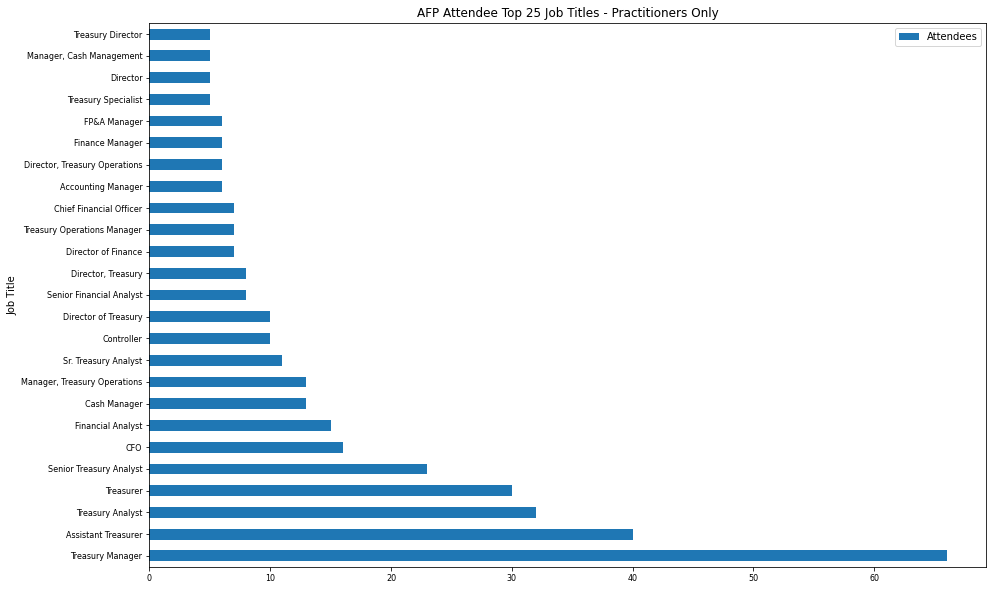

In [381]:
ax = fig.add_subplot()
title = 'AFP Attendee Top 25 Job Titles - Practitioners Only'
ax = df_tit.nlargest(25, 'Attendees').plot.barh(x='Job Title', 
                                            y='Attendees', 
                                            rot = 0,
                                            fontsize = '8',
                                            figsize=(15,10),
                                            title = title)
ax.figure.savefig('Titles.png', dpi=96)

In [ ]:



for i, d in enumerate(data):
    patch_handles.append(ax.barh(y_pos, d, 
      color=colors[i%len(colors)], align='center', 
      left=left))
    left += d

for j in range(len(patch_handles)):
    for i, patch in enumerate(patch_handles[j].get_children()):
        bl = patch.get_xy()
        x = 0.5*patch.get_width() + bl[0]
        y = 0.5*patch.get_height() + bl[1]
        ax.text(x,y, "%d%%" % (percentages[i,j]), ha='center')

Text(0, 0.5, 'Math Score')

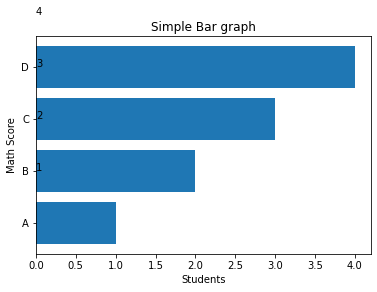

In [443]:
barplot = plt.barh(x, y)
for bar in barplot:
    yval = bar.get_width()
    plt.text(bar.get_x(), bar.get_width(), int(yval))
    
plt.title("Simple Bar graph")
plt.xlabel('Students')
plt.ylabel("Math Score")

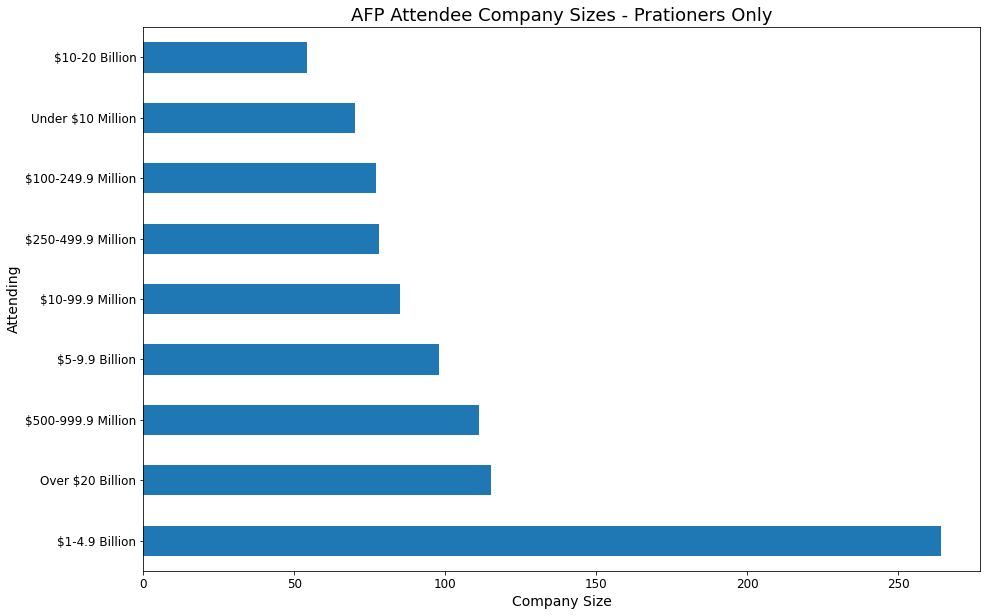

In [421]:
fig = plt.figure(1)
ax = fig.add_subplot()
title = 'AFP Attendee Company Sizes - Prationers Only'
ax.set_title(label = title, fontsize = '18', fontweight = '1')
ax = df['Company Size'].value_counts().plot.barh(x='Company Size', 
                                            y='Attending', 
                                            rot=0,
                                            fontsize = '12',
                                            figsize=(15,10))
for p in ax.patches:
    ax.annotate(format(p.get_width(), '.0f'), 
                   (p.get_x() + p.get_height() / 2., p.get_width()), 
                   ha = 'right', 
                   va = 'bottom', 
                   size=15,
                   color = 'black',
                   textcoords = 'offset points',
                   clip_on = True)

plt.xlabel("Company Size", size=14)
plt.ylabel("Attending", size=14)

ax.figure.savefig('Sizes.png', dpi=96)

In [ ]:
plt.figure(figsize=(8, 6))
splot=sns.barplot(x="continent",y="lifeExp",data=df)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.xlabel("Continent", size=14)
plt.ylabel("LifeExp", size=14)
plt.savefig("add_annotation_to_bars_in_barplot_Seaborn_Python.png")

In [209]:
# Get Attendees by State
value_counts = df['STATE_ABBR'].value_counts(dropna=True, sort=True)
df_counts = pd.DataFrame(value_counts)
df_counts = df_counts.reset_index()
df_counts.columns = ['STATE_ABBR', 'Attendees']
df_counts.head(2)

,STATE_ABBR,Attendees
0,CA,145
1,NY,140


In [210]:
# Add Attendees / State to Geo df
usa_gdf = usa.merge(df_counts, on='STATE_ABBR')
usa_gdf.head(2)

,STATE_NAME,STATE_FIPS,STATE_ABBR,geometry,Attendees
0,Washington,53,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",27
1,Montana,30,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6...",13


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

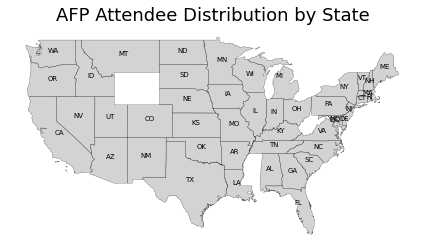

In [217]:
# Setup Map

# fig, ax = plt.subplots(1, 1)
# usa_gdf.plot(column='Attendees', ax=ax, legend=True)

fig = plt.figure(1, figsize=(25,15)) 
ax = fig.add_subplot()
usa_gdf.apply(lambda x: ax.annotate(s=x.STATE_ABBR, xy=x.geometry.centroid.coords[0], ha='center', fontsize=7), axis=1)
usa_gdf.boundary.plot(ax=ax, color='Black', linewidth=.2)
usa_gdf.plot(ax=ax, color='lightgrey', figsize=(12, 12))
ax.set_title('AFP Attendee Distribution by State', fontdict={'fontsize': '18', 'fontweight' : '3'})
ax.set_axis_off()
fig.tight_layout()
fig.savefig('usa.png', dpi=96)
usa.crs